This notebook was prepared with the help of DATAI Team Machine Learning Udemy Course and DATAI Team Deep Learning Tutorial for Beginners Notebook on Kaggle.

# Red Wine Quality 
### Input variables (based on physicochemical tests):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol


### Output variable (based on sensory data):
* quality (score between 0 and 10)

In [ ]:
# Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For plot
from sklearn.model_selection import train_test_split # For splitting data as train and test
from sklearn.linear_model import LogisticRegression # Sklearn library - Logistic Regression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Logistic Regression
* Logistic Regression can be used as classification model when we talk about binary classification (0 and 1 outputs).
* Logistic regression is actually a very simple neural network.

In [ ]:
# Read csv
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
data.head()

In [ ]:
data.info()

In [ ]:
# Lets check our output
print("Maximum Quality Value:",data.quality.max())
print("Minimum Quality Value:",data.quality.min())
print(data.quality.head())

* As you see, our output (Wine Quality) value is between 3 and 8. So, It is not binary value.
* You can think that we shouldn't use Logistic Regression Classification for this dataset because the output is not binary value. But, We can convert it to binary. I will make quality 7 or higher getting classified as 'good/1' and the remainder as 'not good/0.
## - Let's start

### Now lets look at computation graph of logistic regression
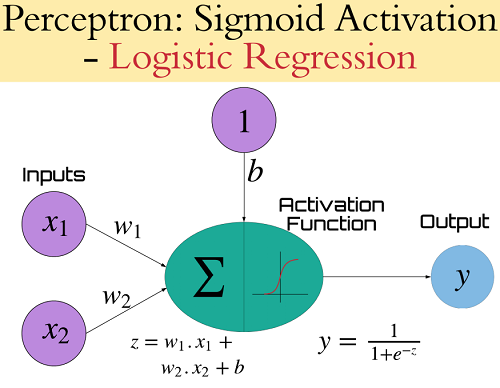
* Parameters are weight and bias.
* Weights: coefficients of each pixels
* Bias: intercept
* z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
* In an other saying => z = b + x1w1 + x2w2 + ... + x_n*w_n
* y = sigmoid(z)
* Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.

### Why we use sigmoid function?
* It gives probabilistic result
* It is derivative so we can use it in gradient descent algorithm.
* Lets make example:
* Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
* Now lets start with from beginning and examine each component of computation graph more detailed.

In [ ]:
data.head()

### If quality is 7 or 8 it is good quality which means "1" otherwise "0" which means bad quality

In [ ]:
data.quality = [1 if each >= 7 else 0 for each in data.quality] # if quality is 7 or 8 it is good quality which means "1"
print(data.info())
print(data.head())
y = data.quality.values
x_data = data.drop(["quality"],axis=1)

In [ ]:
# Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x.head()

In [ ]:
# Test - Train Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

## Initializing parameters

* The first step is multiplying each x values with their own weights.
* The question is that what is the initial value of weights?
* There are some techniques but to not make problem more difficult initial weights were selected as 0.01.
* Also initial bias is 0.
* Lets write some code.

In [ ]:
# Parameter initialize and sigmoid function

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

# w,b = initialize_weights_and_bias(30)

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

# print(sigmoid(0))

## Forward Propagation
* ### The all steps from X to cost is called forward propagation

    * z = (w.T)x + b => in this equation we know x that is array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
    * Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
    * Then we calculate loss(error) function.
    * Cost function is summation of all loss(error).
    * Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

* As we write sigmoid method and calculate y_head. Lets learn what is loss(error) function
* Loss function has an important job in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model. Let's say we have a prediction that is correct or not correct and how do we check whether it is correct or not? The answer is with loss(error) function:
* Mathematical expression of log loss(error) function is that: 
    <a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="duzeltme" border="0"></a>
* It says that if you make wrong prediction, loss(error) becomes big.
* After that, we find the cost function that is summation of loss function. Each input creates loss function. Cost function is summation of loss functions that is created by each input.

##  Optimization Algorithm with Gradient Descent
* Well, now we know what is our cost that is error.
* Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update weights and bias.
* In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
* Lets make an example:
    * We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
    * It looks like this. (red lines)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)
    * w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.
    * Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again. 
    * Lets say according to forward propagation with w = 2, cost function is 0.4. Hmm, we are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.
    * Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.
    * Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.
    * Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function. 
    * Everything looks like good but how we find slope? If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)
    * Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with  α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).
    * Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.
  
* I think now you understand the logic behind forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them). Also you learn gradient descent. Before implementing the code you need to learn one more thing that is how we take derivative of cost function according to weights and bias. It is not related with python or coding. It is pure mathematic. There are two option first one is to google how to take derivative of log loss function and second one is even to google what is derivative of log loss function :) I choose second one because I cannot explain math without talking :) 
$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [ ]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 5 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

* Up to this point we learn our parameters. It means we fit the data. 
* In order to predict we have parameters. Therefore, lets predict.
* In prediction step we have x_test as a input and while using it, we make forward prediction.

In [ ]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Now lets put them all together.

In [ ]:
# logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100)

* We learn logic behind simple neural network(logistic regression) and how to implement it.
* Now that we have learned logic, we can use sklearn library which is easier than implementing all steps with hand for logistic regression.

## Logistic Regression with Sklearn
* In sklearn library, there is a logistic regression method that ease implementing logistic regression.

In [ ]:
# Logistic Regression with Sklearn 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

## Summary
What we did at this first part:
    
* Initialize parameters weight and bias
* Forward propagation
* Loss function
* Cost function
* Backward propagation (gradient descent)
* Prediction with learnt parameters weight and bias
* Logistic regression with sklearn

In conclusion, in first part we learned the math behind logistic regression classification and wrote the code. In second part, we used sklearn library for logistic regression classification. 
    
### Our accuracy without using library is 85.3125 %, with library 86.875 %